### 导包、声明数据

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# https://tensorflow.google.cn/install

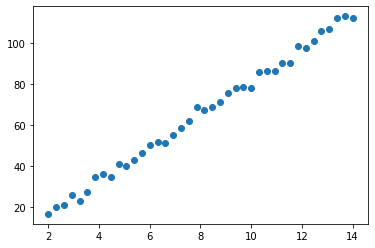

In [4]:
X = np.linspace(2,14,40)
w = np.random.randint(1,10,size = 1)[0]
b = np.random.randint(-5,5,size = 1)[0]
y = X*w + b + np.random.randn(40)*2
plt.scatter(X,y)

In [280]:
epoch = 601 #循环次数
learning_rate = 0.01#学习率，步幅
display_num = 10#每运算10次，打印输出一下

$$(X^TX)^{-1}X^Ty$$

### 定义模型变量：w、b
### 定义了模型和损失
### 定义优化算法

In [297]:
# 初始化，给了一个，随机给的，占位符，不是结果！
W = tf.Variable(tf.random.normal(shape = [1]),name = 'weights')#权重、斜率
B = tf.Variable(tf.random.normal(shape = [1]),name = 'bias')# 截距
def linear_model(X):#线性模型 f(X) = X*W + B
#     return tf.multiply(X,W) + B
    return X*W + B
def sqare_loss(y_pred,y_true):#最小二乘法
#     return tf.reduce_mean(tf.pow(tf.subtract(y_true,y_pred),2))
    return tf.reduce_mean((y_pred - y_true)**2)
# 优化算法：随机梯度下降
sgd = tf.optimizers.SGD(learning_rate)#随机梯度下降
sgd

### 定义优化过程，随机梯度下降

In [298]:
def run_optimization():
    with tf.GradientTape() as g:# 自动求导，自动计算
        y_pred = linear_model(X)# 使用模型进行预测
        loss = sqare_loss(y_pred,y)# 计算最小二乘法的损失
#     计算梯度，导数，可以根据梯度，进行随机梯度下降
    gradients = g.gradient(loss,[W,B])# 求loss对W和B的偏导数
#     进行梯度下降，更新了W和B
    sgd.apply_gradients(zip(gradients,[W,B]))
    return loss.numpy(),W.numpy(),B.numpy()

### for循环进行计算

In [299]:
%%time
for i in range(1,51):
    loss_,W_,B_ = run_optimization()
print(W_,B_)

[7.371913] [0.9411092]
Wall time: 128 ms


In [284]:
print('标准答案：',w,b)

标准答案： 7 4


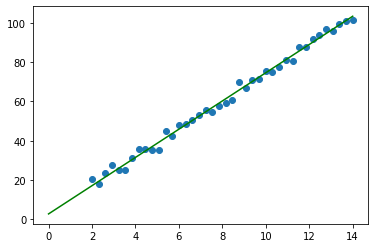

In [285]:
plt.scatter(X,y)
x = np.linspace(0,14,100)
plt.plot(x,W_[0]*x + B_[0],color = 'green')

In [5]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X.reshape(-1,1),y)
display(linear.coef_,linear.intercept_)

array([8.12171985])

0.38400196274582754

In [6]:
from sklearn.linear_model import SGDRegressor

In [7]:
%%time
sgdRegressor = SGDRegressor()
sgdRegressor.fit(X.reshape(-1,1),y)
display(sgdRegressor.coef_,sgdRegressor.intercept_)

array([8.09386311])

array([0.7859568])

CPU times: total: 15.6 ms
Wall time: 3.99 ms
